In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
#insertion sort function
def insertionSort(arr, n, m):
    numOfComp = 0
    
    for i in range(n+1, m+1):
        for j in range (i, n, -1):
            numOfComp+=1
            if arr[j] < arr[j-1]:
                temp = arr[j]
                arr[j] = arr[j-1]
                arr[j-1] = temp
            else:
                break
    return numOfComp

# In-Place mergesort

In [4]:
# merge function
def merge(arr, n, m):
    mid = (n+m)//2
    if (m-n <= 0):
        return 0

    numOfComp = 0;
    list1, list2 = n, mid+1

    #run while both half of loop not overlapping
    while (list1 <= mid and list2 <= m):
        numOfComp+=1
        #if left sub arrary > right sub array, store right sub array in temp and shift array to the right by 1 element
        if arr[list1] > arr[list2]:
            temp = arr[list2]
            list2+=1
            mid+=1
            for i in range(mid, list1, -1):
                arr[i] = arr[i-1]
            arr[list1] = temp
            list1+=1

        #if left sub array < right subarray, increment start of left sub array
        elif arr[list1] < arr[list2]:
            list1+=1

        #if both sub array elements are equal
        else:
            #check if end of list
            if (list1==mid and list2==m):
                break

            #store right subarray element, shift start of left subarray, shift entire array to the right by 1 element, then place temp into sorted array
            temp = arr[list2]
            list2+=1
            list1+=1
            mid+=1
            for i in range(mid, list1, -1):
                arr[i] = arr[i-1]
            arr[list1] = temp
            list1+=1
            
    #print("merge comps:", numOfComp)
    return numOfComp
    

# hybrid of mergeSort that uses insertionSort when len of sub array < boundary
def mergeSort(arr, n, m, S):
    #print("\n\n==============\n WHERE AM I %d\n===============\n" % m)
    leftCount = 0
    rightCount = 0
    boundary = S
    mid = (n + m) // 2

    """
    print("\n\nunsorted mergesort():")
    for i in range(n, m+1):
        print(arr[i], end=',')
    """
    

    if (m - n) < 0:
        return 0

    elif (m - n) >= 1:

        #use insertion sort if number of elements in this subarray is < boundary
        if (m-n+1) <= boundary:
            return insertionSort(arr,n,m)
            
        else:
            
            # recursively sort first half
            leftCount = mergeSort(arr, n, mid, boundary)
            
            """
            print("\nusing mergeSort()")
            print("\nList1:")
            for i in range(n, mid+1):
                print(arr[i], end=',')
            print("\n\nnumber of leftCount = ", leftCount, n, m)
            """
            
            # recursively sort second half
            rightCount = mergeSort(arr, mid + 1, m, boundary)

            """
            print("\n\nList2:")
            for i in range(mid+1, m+1):
                print(arr[i], end=',')
            """
            
            #merge the 2 lists after recursive calls
            mergeCount = merge(arr, n, m)

            if leftCount is None:
                leftCount = 0
            if rightCount is None:
                rightCount = 0
            if mergeCount is None:
                mergeCount = 0

            """
            print("\n\nMerged list:")
            for i in range(n, m+1):
                print(arr[i], end=',')
            print("Number of comp:", mergeCount)
            print("merge+insertion:", mergeCount+ leftCount+rightCount)
            """


            return mergeCount +leftCount+rightCount

    """
    print("\n\nFull list:")
    for i in range(8):
        print(arr[i],end=',')
    """

# MergeSort by creating additonal array

In [25]:
def merge(arr, n, mid, m):
    leftArray = arr[n:mid+1]
    rightArray = arr[mid+1:m+1]
    leftPointer, rightPointer = 0, 0
    k = n  # Start index for the merged segment
    keyComp = 0

    while leftPointer < len(leftArray) and rightPointer < len(rightArray):
        keyComp += 1
        if leftArray[leftPointer] < rightArray[rightPointer]:
            arr[k] = leftArray[leftPointer]
            leftPointer += 1
        else:
            arr[k] = rightArray[rightPointer]
            rightPointer += 1
        k += 1

    # Copy remaining elements
    while leftPointer < len(leftArray):
        arr[k] = leftArray[leftPointer]
        leftPointer += 1
        k += 1

    while rightPointer < len(rightArray):
        arr[k] = rightArray[rightPointer]
        rightPointer += 1
        k += 1

    return keyComp


def mergeSort(arr, n, m, boundary):
    if m - n <= boundary:
        return insertionSort(arr, n, m)
    
    if n < m:
        mid = (n + m) // 2
        leftCount = mergeSort(arr, n, mid, boundary)
        rightCount = mergeSort(arr, mid + 1, m, boundary)
        return merge(arr, n, mid, m) + leftCount + rightCount
    
    return 0


In [ ]:
arr = [10,9,8,7,6,5,4,3,2,1]
print(mergeSort(arr,0,len(arr)-1,0))

In [8]:
def generate_random_datasets(noOfList, min_size, max_size, step_factor):
    """
    Generate random datasets of integers with increasing sizes.
    
    Parameters:
    min_size (int): Minimum size of the dataset (default: 1000).
    max_size (int): Maximum size of the dataset (default: 10,000,000).
    step_factor (int): Factor by which to increase the dataset size (default: 10).
    max_value (int): Maximum value for the integers in the dataset (default: 100,000).
    
    Returns:
    dict: Dictionary containing datasets with keys as sizes and values as the generated arrays.
    """
    datasets = {}
    
    # Generate datasets of increasing sizes
    size = min_size
    for i in range(noOfList):
        # Generate a random dataset of integers in the range [1, max_value]
        datasets[size] = np.random.randint(1, max_size, size=size)
        #print(f"Generated dataset of size {size}")
        
        # Increase the size by the step factor

        if size < max_size:
            if step_factor <= 1:
                size += 1
                size = int(size)
            else:
                size*=step_factor
                size=int(size)
        else:
            size+=10
    
    return datasets


In [10]:
random_datasets = generate_random_datasets(20, 1000,100_000, 1.15)

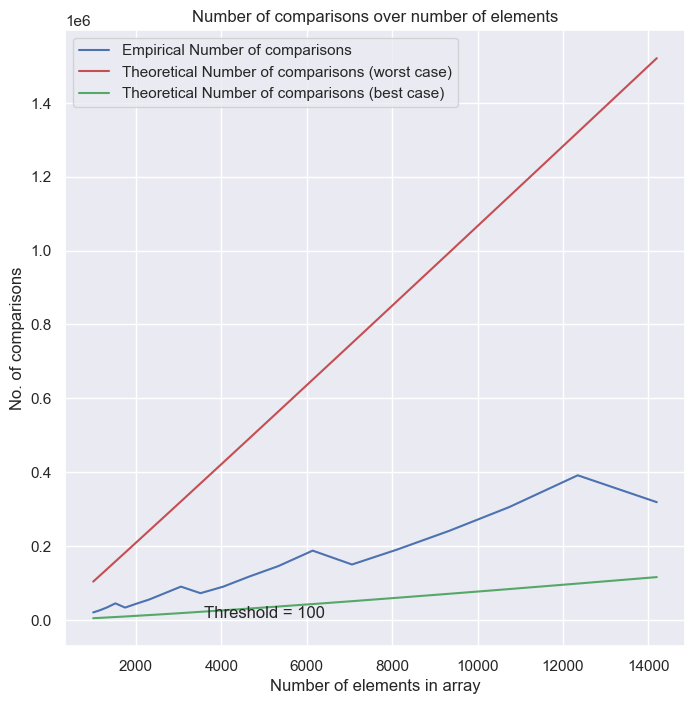

In [12]:
x=[]
y=[]
boundary = 100

x_theory=[]
y_theory=[]
x_best=[]
y_best=[]
                       

#number of key comparisons + plot theoretical data
for i in random_datasets.keys():
    x.append(i)
    y.append(mergeSort(random_datasets[i], 0, len(random_datasets[i])-1, boundary))
    x_theory.append(i)
    y_theory.append(i*boundary + (i* np.log2(i//boundary)))
    x_best.append(i)
    y_best.append(i+ i* np.log2(i//boundary))

# Create a figure and axis
plt.figure(figsize=(8,8))

# Plot the data
plt.plot(x, y, linestyle='-', color='b', label='Empirical Number of comparisons')

plt.plot(x_theory, y_theory, linestyle='-', color='r', label='Theoretical Number of comparisons (worst case)')

plt.plot(x_best, y_best, linestyle='-', color='g', label='Theoretical Number of comparisons (best case)')


# Adding title and labels
plt.title('Number of comparisons over number of elements')
plt.xlabel('Number of elements in array')
plt.ylabel('No. of comparisons')
plt.text(5000, 5000, 'Threshold = ' + str(boundary), ha='center')


# Show grid
plt.grid(True)

# Add a legend
plt.legend()

# Display the plot
plt.show()

# Fixed input size, ranging S

In [15]:
random_dataset = generate_random_datasets(1, 1000, 1000, 1)

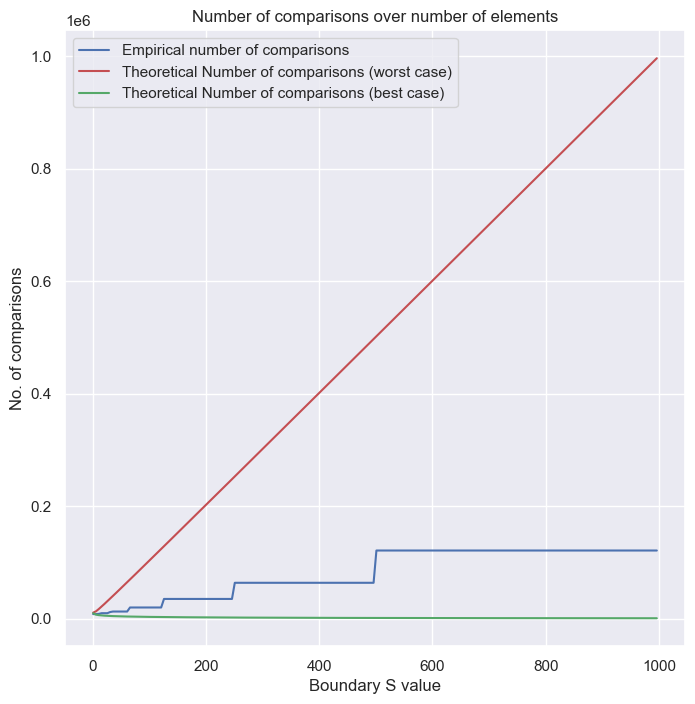

In [17]:
x=[]
y=[]

x_theory=[] #worst case
y_theory=[]
x_best=[] #best case
y_best=[]

sizeOfArray = len(random_dataset[list(random_dataset.keys())[0]])
#sizeofArray = 1000

#add data points for ranging boundary value i
for i in range(1, sizeOfArray ,5) :
    x.append(i)
    #y.append(mergeSort(random_dataset.copy(), 0,  sizeOfArray - 1, i))
    y.append(mergeSort(random_dataset[list(random_dataset.keys())[0]].copy(), 0,  sizeOfArray - 1, i))
    x_theory.append(i)
    y_theory.append(i*sizeOfArray + sizeOfArray*np.log2(sizeOfArray/i))
    x_best.append(i)
    y_best.append(i+ sizeOfArray* np.log2(sizeOfArray/i))
    

# Create a figure and axis
plt.figure(figsize=(8,8))

# Plot the data

plt.plot(x, y, linestyle='-', color='b', label='Empirical number of comparisons')

# Plot theoretical 
plt.plot(x_theory, y_theory, linestyle='-', color='r', label='Theoretical Number of comparisons (worst case)')

plt.plot(x_best, y_best, linestyle='-', color='g', label='Theoretical Number of comparisons (best case)')


# Adding title and labels
plt.title('Number of comparisons over number of elements')
plt.xlabel('Boundary S value')
plt.ylabel('No. of comparisons')


# Show grid
plt.grid(True)

# Add a legend
plt.legend()

# Display the plot
plt.show()

# Finding optimal S for HybridSort

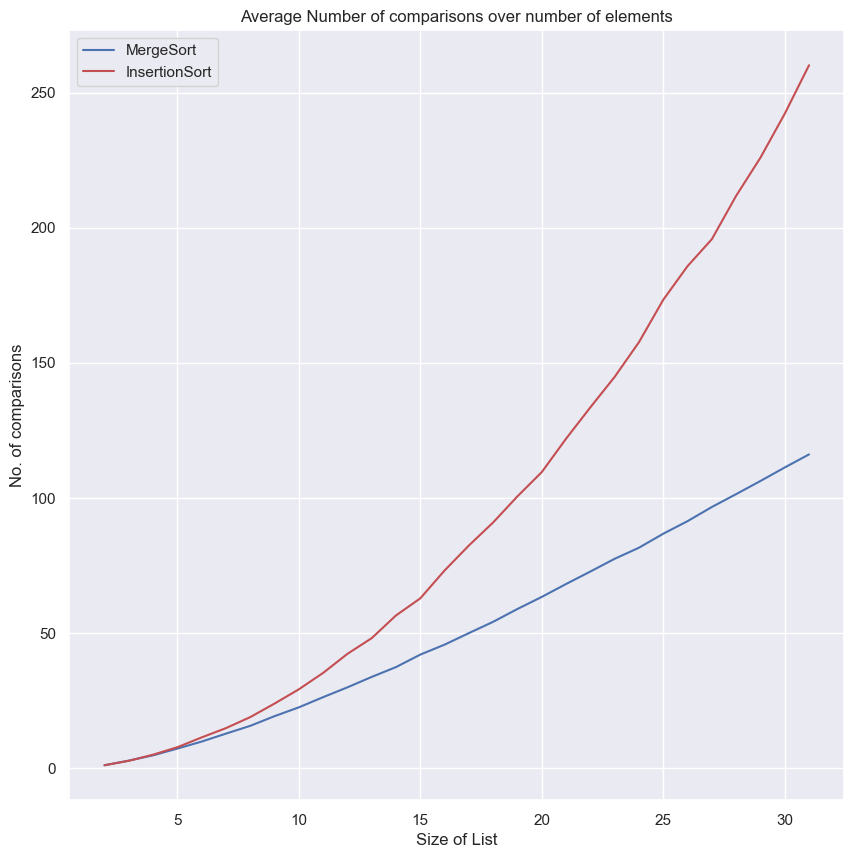

In [19]:
x_insert=[]
y_insert=[]

x_merge=[]
y_merge=[]

avgRunTime = 130

numOfDatasets = 30

insertionSum = [0.0] * numOfDatasets
mergeSum = [0.0] * numOfDatasets


for i in range(avgRunTime):
    random_datasets = generate_random_datasets(numOfDatasets, 2, 1000, 1)
    keyList = list(random_datasets.keys())
    for j in range(numOfDatasets):
        #print(random_datasets[keyList[j]])
        #print(keyList[j])
        mergeSum[j] += mergeSort(random_datasets[keyList[j]].copy(), 0, len(random_datasets[keyList[j]])-1, 0)
        insertionSum[j] += insertionSort(random_datasets[keyList[j]].copy(), 0, keyList[j]-1)

j=0
for i in keyList:
    #print(i)
    x_insert.append(i)
    x_merge.append(i)
    y_insert.append((float)(insertionSum[j] / avgRunTime))
    y_merge.append((float)(mergeSum[j]/avgRunTime))
    j+=1
    

# Create a figure and axis
plt.figure(figsize=(10,10))

# Plot the data

plt.plot(x_merge, y_merge, linestyle='-', color='b', label='MergeSort')

# Plot theoretical 
plt.plot(x_insert, y_insert, linestyle='-', color='r', label='InsertionSort')



# Adding title and labels
plt.title('Average Number of comparisons over number of elements')
plt.xlabel('Size of List')
plt.ylabel('No. of comparisons')


# Show grid
plt.grid(True)

# Add a legend
plt.legend()

# Display the plot
plt.show()

# Part D

In [23]:
dataset =  generate_random_datasets(1,10_000_000, 10_000_000, 1)

In [ ]:
print(len(dataset[10_000_000]))

In [ ]:
print(dataset[10_000_000])

In [27]:
import time

start = time.time()
print("Number of key comparisons of MergeSort: ",mergeSort(dataset[10_000_000].copy(), 0, len(dataset[10_000_000])-1, 0))
end = time.time()
print("Time taken for MergeSort = " , end - start)

Number of key comparisons of MergeSort:  171745079
Time taken for MergeSort =  38.57625699043274


In [31]:
start = time.time()
print("Number of key comparisons of HybridSort, S=6: ",mergeSort(dataset[10_000_000].copy(), 0, len(dataset[10_000_000])-1, 6))
end = time.time()
print("Time taken for HybridSort = " , end - start)

Number of key comparisons of HybridSort, S=6:  172048976
Time taken for HybridSort =  35.004003047943115
